<a href="https://colab.research.google.com/github/Ohmyprogram/Delivery-Robot-TextMining/blob/main/%EA%B0%90%EC%84%B1%EB%AC%B8%EC%9E%A5_WordCloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 코랩 환경 설정

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
# 디렉토리 변경
%cd drive/MyDrive/혁신기술텍스트마이닝

In [ ]:
# 현재 디렉토리 경로 확인
!pwd

# 라이브러리

In [ ]:
# !pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 453 kB 72.3 MB/s 


In [ ]:
# !pip install WordCloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# !pip install PyKomoran

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.4 MB 35.7 MB/s 
     |████████████████████████████████| 198 kB 65.1 MB/s 


In [ ]:
import pandas as pd
from wordcloud import WordCloud
from collections import Counter
from PyKomoran import *
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import regex
import platform
import matplotlib.font_manager as fm

In [ ]:
# 필터 설정
mask = '\\n|\\t|\\r,'

#%% Komoran 작동
komoran = Komoran("STABLE")

# # 사용자 사전 추가
# komoran.set_user_dic("user_dictionary.txt")

# raw데이터 읽기 / 밑에는 예시인데, 4명에게 받은 물품 주문에 대한 감성일기 글이라고 가정
documents=[
    '점심을 주문하기 위해 요기요에 들어가서 메뉴를 보고 짜장면과 탕수육을 대연각에서 주문하였다. 대연각은 로봇과 연계 배송을 하는지 기존 주문 프로세스와 다르게 라이더 배정 및 로봇 배차 정보가 전송되었다. 로봇이 어떻게 배송을 해주는 것인지에 대해 자세한 설명이 없어 주문이 잘 된 것인지, 잘못 된 것인지 모호했고, 기존 프로세스와 조금 상이하여 음식이 잘못 올 수도 있겠다는 우려가 조금 있었다. 우선 처음 경험하는 로봇 배달이었기에 생소하여 이에 대한 자세한 설명과 프로세스에 대한 정보를 팝업 혹은 안내 형태로 알려주었으면 좋겠다는 생각이 들었다.',
    '라이더가 물품을 픽업 후 배달을 시작했다는 알림을 받았고, 기존 주문 배달 프로세스와 동일하게 라이더의 배달 이동경로 확인이 가능하여 이 단계에서는 크게 불편한 부분을 느끼지 못하였다. 하지만 로봇 배송이 시작되었는지 로봇의 배송 도착 안내에 대한 문자를 받았을 때, 조금 불편함을 느꼈다. 라이더가 물품을 픽업하는 부분에 대해서는 카카오톡으로 알림이 오고 이것이 요기요 앱과 연동되어 버튼 하나로 바로 앱으로 연동되지만 로봇 배달에 대한 안내는 문자로 수신받아 카카오톡, 요기요, 문자 창까지 삼중으로 켜놓아야 했다. 로봇 배달에 대한 안내 또한 요기요 앱 혹은 카카오톡으로 수신받으면 좋을 듯 하다. 또한 로봇의 도착 소요시간과 이동경로 확인이 어려워 라이더가 배달하는 프로세스보다 훨씬 불편했다.',
    '로봇이 도착했다는 전화가 왔었는데, 당시에 내가 화장실에 가있어 전화를 받지 못하였다. 로봇의 대략적인 도착시간 또한 안내 받지 못하였기 때문에 언제쯤 도착할 것이라는 시간대를 전혀 몰라 로봇의 도착 전화를 15분 후에 확인할 수 있었다. 물품을 수령하러 로봇 도착 포인트로 가 문자로 수신받았던 본인인증 번호를 입력하였고 로봇 물품칸이 열려 음식을 수령하였다.',
    '전화를 못받았던 터라 음식이 다 식었고, 불어있었다. 로봇이 도착했다고 안내 전화가 왔었는데 내가 전화를 받지 못하여 음식 상태가 안좋은 것 같아 반품 요청을 하기가 애매하여 우선 수령완료를 로봇 터치패드에서 눌렀다. 주문 물품 및 음식에 대한 반품 기준이 필요할 듯 하였다. 과실이 누구인지가 애매하여 이러한 부분은 명확한 기준이 필요할 것으로 보인다. 또한, 로봇 배송의 이점은 배달 소요시간인 듯 한데, 소요시간이 오히려 오래걸린 듯 하고, 서비스 프로세스 자체가 너무 생소하여 이에 대한 정확한 안내가 필요해보인다. 로봇의 경로 표시 또한 해주어야 할 듯 하다.'
]


# raw데이터에서 감정 문장 포함한 문장 도출
emo_dic = pd.read_excel('/content/drive/MyDrive/혁신기술텍스트마이닝/dic/emo_dic.xlsx')       #감성단어사전(emo_dic)불러오기
emo_word = list(emo_dic['WORD'])

sentences = []                                                                                #단문들 담을 리스트
for doc in documents:
  sen = doc.split('.')
  sen.pop()
  sentences = sentences+sen


# 감성문장, 감성단어 데이터 프레임 만들기
# emo_word(감성단어)를 단문이 포함하고 있는지 확인
emo_sen = []                                                                                  #감성 문장 담을 리스트
emo_word_ls = []                                                                              #감성 단어 리스트 담을 리스트

for i in range(len(sentences)):
  word_ls = []
  for word in emo_word:
    if word in komoran.get_morphes_by_tags(sentences[i]):
      if sentences[i] not in emo_sen:
        emo_sen.append(sentences[i])
      word_ls.append(word)
  if word_ls != []:
    emo_word_ls.append(word_ls)

In [ ]:
emo_df = pd.DataFrame({'emo_sen':emo_sen,
                             'emo_word':emo_word_ls})
emo_df

,emo_sen,emo_word
0,대연각은 로봇과 연계 배송을 하는지 기존 주문 프로세스와 다르게 라이더 배정 및 ...,"[기존, 다르]"
1,로봇이 어떻게 배송을 해주는 것인지에 대해 자세한 설명이 없어 주문이 잘 된 것인...,"[없, 기존, 우려, 모호]"
2,우선 처음 경험하는 로봇 배달이었기에 생소하여 이에 대한 자세한 설명과 프로세스에...,"[좋, 경험, 생소]"
3,"라이더가 물품을 픽업 후 배달을 시작했다는 알림을 받았고, 기존 주문 배달 프로세스...","[가능, 불편, 기존, 느끼, 크]"
4,"하지만 로봇 배송이 시작되었는지 로봇의 배송 도착 안내에 대한 문자를 받았을 때,...","[불편, 느끼]"
5,로봇 배달에 대한 안내 또한 요기요 앱 혹은 카카오톡으로 수신받으면 좋을 듯 하다,[좋]
6,또한 로봇의 도착 소요시간과 이동경로 확인이 어려워 라이더가 배달하는 프로세스보다...,"[불편, 어렵]"
7,로봇의 대략적인 도착시간 또한 안내 받지 못하였기 때문에 언제쯤 도착할 것이라는 ...,[모르]
8,로봇이 도착했다고 안내 전화가 왔었는데 내가 전화를 받지 못하여 음식 상태가 안좋...,"[좋, 요청, 안, 애매]"
9,주문 물품 및 음식에 대한 반품 기준이 필요할 듯 하였다,[필요]


In [ ]:
import itertools

list1 = list(emo_df['emo_word'])
list2 = list(itertools.chain(*list1))
print(list2)

['기존', '다르', '없', '기존', '우려', '모호', '좋', '경험', '생소', '가능', '불편', '기존', '느끼', '크', '불편', '느끼', '좋', '불편', '어렵', '모르', '좋', '요청', '안', '애매', '필요', '필요', '애매', '필요', '서비스', '정확', '생소']


In [ ]:
# 문장들에서 나온 감성 단어 리스트
print(set(list2))

{'크', '애매', '생소', '어렵', '모호', '불편', '안', '모르', '우려', '다르', '요청', '없', '가능', '느끼', '기존', '경험', '서비스', '필요', '정확', '좋'}


In [ ]:
# 그래프에서 한글표현을 위해 폰트를 설치합니다.
%config InlineBackend.figure_format = 'retina'

!apt -qq -y install fonts-nanum > /dev/null

In [ ]:
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

In [ ]:
# 기본 글꼴 변경
import matplotlib as mpl
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumBarunGothic')

In [ ]:
# 감성 단어 빈도수 출력
count = Counter(list2)
count.most_common()

[('기존', 3),
 ('좋', 3),
 ('불편', 3),
 ('필요', 3),
 ('생소', 2),
 ('느끼', 2),
 ('애매', 2),
 ('다르', 1),
 ('없', 1),
 ('우려', 1),
 ('모호', 1),
 ('경험', 1),
 ('가능', 1),
 ('크', 1),
 ('어렵', 1),
 ('모르', 1),
 ('요청', 1),
 ('안', 1),
 ('서비스', 1),
 ('정확', 1)]

In [ ]:
idx = [i for i in range(len(emo_df)) if "좋" in emo_df["emo_word"][i]]
lines = list(emo_df.iloc[idx,0])
lines

[' 우선 처음 경험하는 로봇 배달이었기에 생소하여 이에 대한 자세한 설명과 프로세스에 대한 정보를 팝업 혹은 안내 형태로 알려주었으면 좋겠다는 생각이 들었다',
 ' 로봇 배달에 대한 안내 또한 요기요 앱 혹은 카카오톡으로 수신받으면 좋을 듯 하다',
 ' 로봇이 도착했다고 안내 전화가 왔었는데 내가 전화를 받지 못하여 음식 상태가 안좋은 것 같아 반품 요청을 하기가 애매하여 우선 수령완료를 로봇 터치패드에서 눌렀다']

In [ ]:
# 읽은 라인을 한 줄로 만들기
one_line = "".join(lines)
one_line = regex.sub(mask, '', one_line)

slash_line = komoran.get_list(one_line)

In [ ]:
#%% (단어,품사) 형태로 만들기
tagged_list = []
for i in range(len(slash_line)):
    a = str(slash_line[i]).split('/')
    tagged_list.append(a)

for j in tagged_list:
    if len(j) != 2:
        tagged_list.remove(j)

In [ ]:
# #%% STOPWORDS LIST 생성
# f = open("stopwords.txt", 'r', encoding="euc-kr")
# lines = f.readlines()
# f.close()

# stop_words = []
# for i in range(len(lines)):
#     stop_words.append(regex.sub(mask, '', lines[i]))

# print(stop_words)

# #stopwords 제거
# sw_removed_list = []
# for i in range(len(tagged_list)):
#     if tagged_list[i][0] not in stop_words:
#         sw_removed_list.append(tagged_list[i])

In [ ]:
#%% 분석 대상에 포함된 품사 단어만 추출
tag_list = ['NNG', 'NNP', 'VA', 'XR']

target_list = []

for k in range(len(tagged_list)):
    if tagged_list[k][1] in tag_list:
        target_list.append(tagged_list[k])
    else:
        continue

In [ ]:
#%% 품사를 제거하고 단어만 남김
word_list = []
for i in range(len(target_list)):
    word_list.append(target_list[i][0])

print(word_list)

['처음', '경험', '로봇', '배달', '생소', '자세', '설명', '프로세스', '정보', '팝업', '안내', '형태', '좋', '생각', '로봇', '배달', '안내', '앱', '카카오', '수신', '좋', '로봇', '도착', '안내', '전화', '전화', '음식', '상태', '안', '좋', '같', '반품', '요청', '애매', '수령', '완료', '로봇', '터치', '패드']


In [ ]:
# 감성 단어 아닌 한글자 단어 빼기 & stopwords 빼기 & VV 중에 감성단어 아닌 VV 찾기
word_list = [i for i in word_list if (len(i) > 1 or i in emo_word) and i != '로봇' ]

In [ ]:
## stopwords로 로봇, 대하

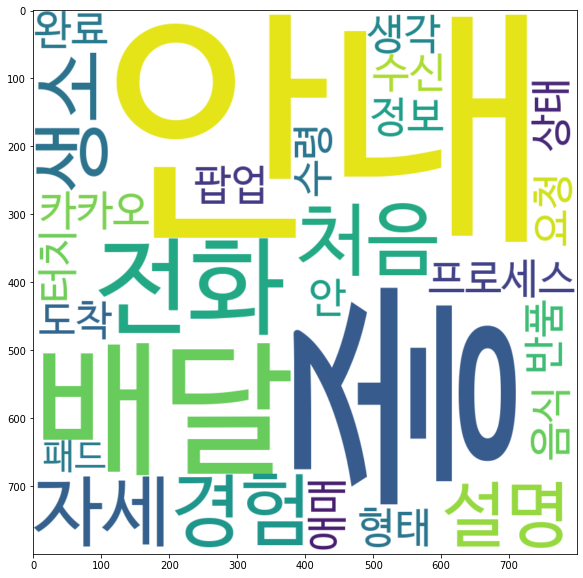

In [ ]:
#%% 워드 클라우드 생성
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
wordcloud = WordCloud(
    font_path = font_path,
    width = 800,
    height = 800,
    background_color="white"
)

count = Counter(word_list)
wordcloud = wordcloud.generate_from_frequencies(count)
array = wordcloud.to_array()

plt.rc('font', family=font_path)
fig = plt.figure(figsize=(10, 10))
plt.imshow(array, interpolation="bilinear")
plt.show()

In [ ]:
emo_df

,emo_sen,emo_word
0,대연각은 로봇과 연계 배송을 하는지 기존 주문 프로세스와 다르게 라이더 배정 및 ...,"[기존, 다르]"
1,로봇이 어떻게 배송을 해주는 것인지에 대해 자세한 설명이 없어 주문이 잘 된 것인...,"[없, 기존, 없어, 우려, 모호]"
2,우선 처음 경험하는 로봇 배달이었기에 생소하여 이에 대한 자세한 설명과 프로세스에...,"[좋, 경험, 안, 생소]"
3,"라이더가 물품을 픽업 후 배달을 시작했다는 알림을 받았고, 기존 주문 배달 프로세스...","[가능, 불편, 기존, 느끼, 크]"
4,"하지만 로봇 배송이 시작되었는지 로봇의 배송 도착 안내에 대한 문자를 받았을 때,...","[불편, 안]"
5,라이더가 물품을 픽업하는 부분에 대해서는 카카오톡으로 알림이 오고 이것이 요기요 ...,[안]
6,로봇 배달에 대한 안내 또한 요기요 앱 혹은 카카오톡으로 수신받으면 좋을 듯 하다,"[좋, 안]"
7,또한 로봇의 도착 소요시간과 이동경로 확인이 어려워 라이더가 배달하는 프로세스보다...,[불편]
8,로봇의 대략적인 도착시간 또한 안내 받지 못하였기 때문에 언제쯤 도착할 것이라는 ...,[안]
9,로봇이 도착했다고 안내 전화가 왔었는데 내가 전화를 받지 못하여 음식 상태가 안좋...,"[좋, 요청, 안, 애매]"


In [ ]:
emo_df['emo_sen'][4]

' 하지만 로봇 배송이 시작되었는지 로봇의 배송 도착 안내에 대한 문자를 받았을 때, 조금 불편함을 느꼈다'

In [ ]:
komoran.get_list('좋았었다')

[좋/VA, 았었/EP, 다/EC]

In [ ]:
# 안 좋, 좋지 않, 안좋, 좋지않, 좋겠, 좋다, 좋았다, 좋았었다. 좋은,
